In [1]:
# Week 3–4: Modeling Cancer Mortality_with Socioeconomic Factors

In [2]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import seaborn as sns

In [3]:
# 2. Load data
df = pd.read_csv('../data/cleaned_data_week1_2.csv')
print(df.shape)
df.head()

(2868, 30)


,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,binnedinc,medianage,medianagemale,...,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,birthrate,avghouseholdsize,county,state
0,1397.0,469,164.9,489.8,61898,260131,11.2,"(61494.5, 125635]",39.3,36.9,...,41.6,32.9,14.0,81.780529,2.594728,4.821857,6.118831,2.54,Kitsap County,Washington
1,173.0,70,161.3,411.6,48127,43269,18.6,"(48021.6, 51046.4]",33.0,32.2,...,43.6,31.1,15.3,89.228509,0.969102,2.246233,4.333096,2.34,Kittitas County,Washington
2,102.0,50,174.7,349.7,49348,21026,14.6,"(48021.6, 51046.4]",45.0,44.0,...,34.9,42.1,21.1,90.922190,0.739673,0.465898,3.729488,2.62,Klickitat County,Washington
3,427.0,202,194.8,430.4,44243,75882,17.1,"(42724.4, 45201]",42.8,42.2,...,35.0,45.3,25.0,91.744686,0.782626,1.161359,4.603841,2.52,Lewis County,Washington
4,57.0,26,144.4,350.1,49955,10321,12.5,"(48021.6, 51046.4]",48.3,47.8,...,35.1,44.0,22.7,94.104024,0.270192,0.665830,6.796657,2.34,Lincoln County,Washington


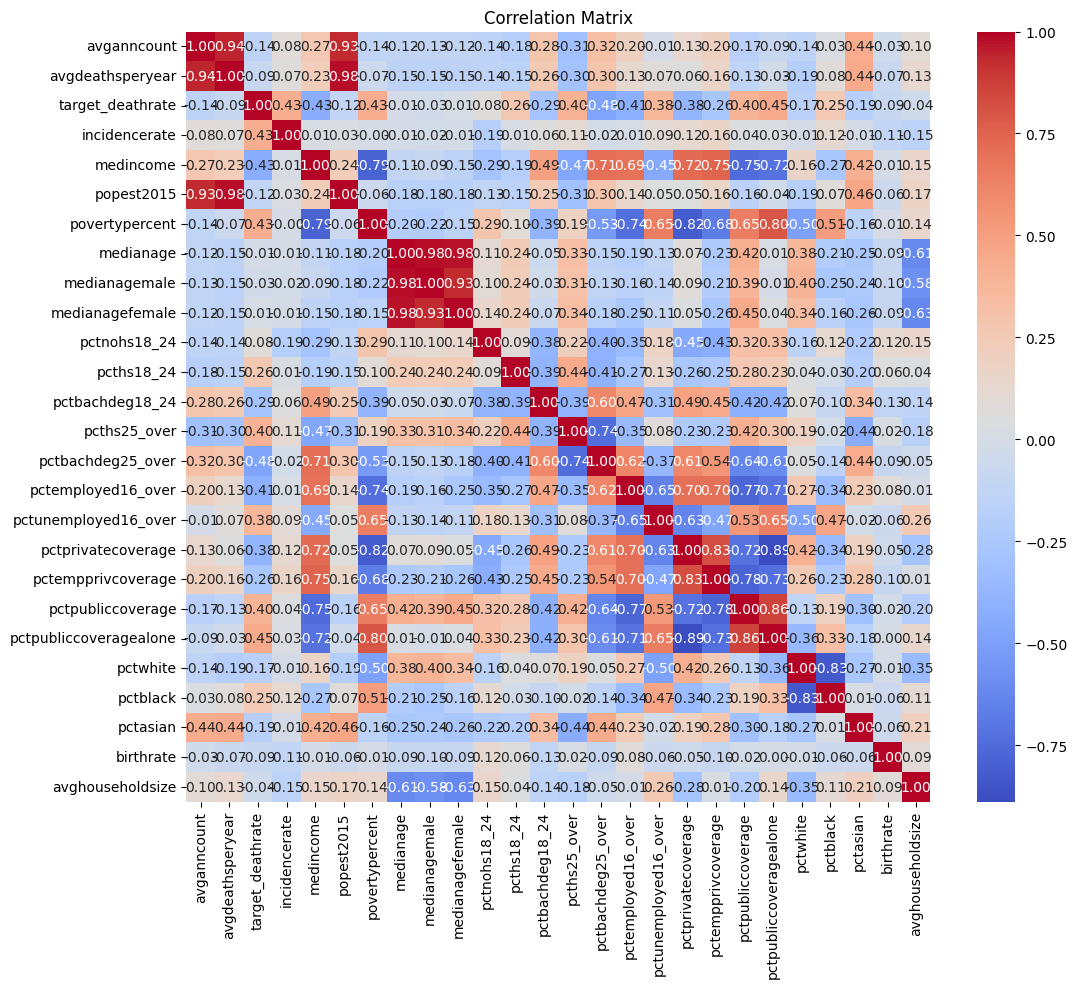

In [4]:
# 3. Correlation Matrix
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12,10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [5]:
# 4. Prepare X and y
target_column = 'target_deathrate'
X = df.drop(columns=[target_column]).select_dtypes(include=['int64', 'float64'])
y = df[target_column]

In [6]:
# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# 6. Build Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"R² Score on Test Set: {r2:.3f}")
print(f"Mean Absolute Error on Test Set: {mae:.3f}")

R² Score on Test Set: 0.429
Mean Absolute Error on Test Set: 14.841


In [8]:
# 7. Cross-validation
cv_scores = cross_val_score(lr, X, y, cv=5, scoring='r2')
print(f"Average Cross-Validation R² Score: {np.mean(cv_scores):.3f}")

Average Cross-Validation R² Score: 0.449


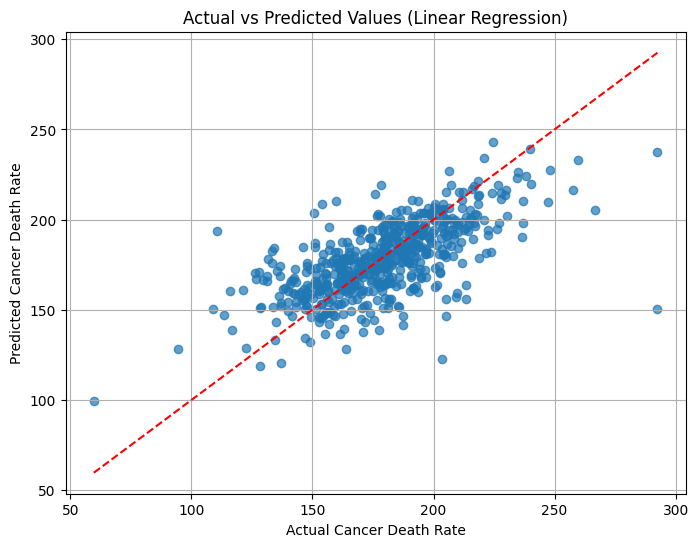

In [9]:
# 8. Visualization: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Cancer Death Rate')
plt.ylabel('Predicted Cancer Death Rate')
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.grid(True)
plt.show()

In [12]:
# 9. Save Predictions
output = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
output.to_csv('linear_regression_predictions.csv', index=False)
print("Predictions saved to 'linear_regression_predictions.csv'")

Predictions saved to 'linear_regression_predictions.csv'


In [13]:
# 10. Xgboost modeling
import xgboost as xgb
from xgboost import XGBRegressor

# 11. Train an XGBoost model
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f"[XGBoost] R² Score on Test Set: {r2_xgb:.3f}")
print(f"[XGBoost] Mean Absolute Error on Test Set: {mae_xgb:.3f}")

[XGBoost] R² Score on Test Set: 0.601
[XGBoost] Mean Absolute Error on Test Set: 12.244


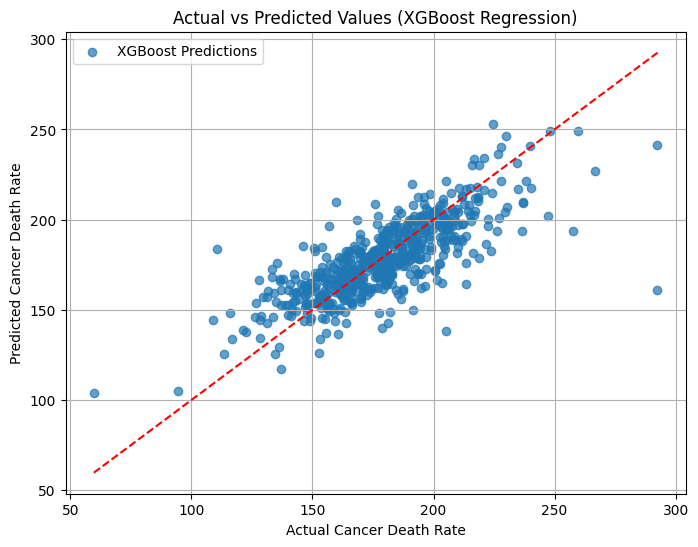

In [14]:
# 12. Compare Actual vs Predicted for XGBoost
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_xgb, alpha=0.7, label='XGBoost Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Cancer Death Rate')
plt.ylabel('Predicted Cancer Death Rate')
plt.title('Actual vs Predicted Values (XGBoost Regression)')
plt.grid(True)
plt.legend()
plt.show()